In [3]:
import pandas as pd
import subprocess
import cv2
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm
import numpy as np
import os
import random
from pathlib import Path
import shutil

In [4]:
archive_save_path = "/kaggle/input/isic_archive_malignant"
archive_csv_path = archive_save_path + "/metadata.csv"

In [7]:
def isic_archive_download(query, save_dir):
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    command = f"isic image download --search 'diagnosis:melanoma AND benign_malignant:malignant AND image_type:dermoscopic' {save_dir}"
    try:
        subprocess.run(command, shell=True, check=True)
    except subprocess.CalledProcessError as e:
        print(e.stderr)

def add_target_colmun(csv_path):
    meta = pd.read_csv(csv_path)
    meta["target"] = meta["benign_malignant"].map(
        lambda x: 1 if x == "malignant" else 0
    )
    meta.to_csv(archive_save_path + "/metadata.csv", index=False)

query = "diagnosis:melanoma AND benign_malignant:malignant AND image_type:dermoscopic"
isic_archive_download(query, archive_save_path)
add_target_colmun(archive_csv_path)

If you have been granted special permissions, logging in with `isic user login` might return more data.



Successfully downloaded 7,200 images to /kaggle/input/isic_archive_malignant/.
Successfully wrote 7,200 metadata records to /kaggle/input/isic_archive_malignant/metadata.csv.
Successfully wrote attributions to /kaggle/input/isic_archive_malignant/attribution.txt.
Successfully wrote 3 license(s) to /kaggle/input/isic_archive_malignant/licenses.


In [5]:
def center_crop(img: np.ndarray):
    height = img.shape[0]
    width = img.shape[1]
    if width > height:
        diff = width - height
        img = img[:, diff // 2 : -diff // 2, :]
    elif height > width:
        diff = height - width
        img = img[diff // 2 : -diff // 2, :, :]
    else:
        pass
    return img


def random_viz_cropped(archive_save_path):
    random.seed(42)
    img_path_list = list(Path(archive_save_path).glob("*"))

    sample = random.sample(img_path_list, 20)
    fig, ax = plt.subplots(4, 5, figsize=(20, 10))
    for i in range(20):
        img = cv2.imread(str(sample[i]))
        img = center_crop(img)
        ax[i // 5, i % 5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i // 5, i % 5].axis("off")
    plt.show()

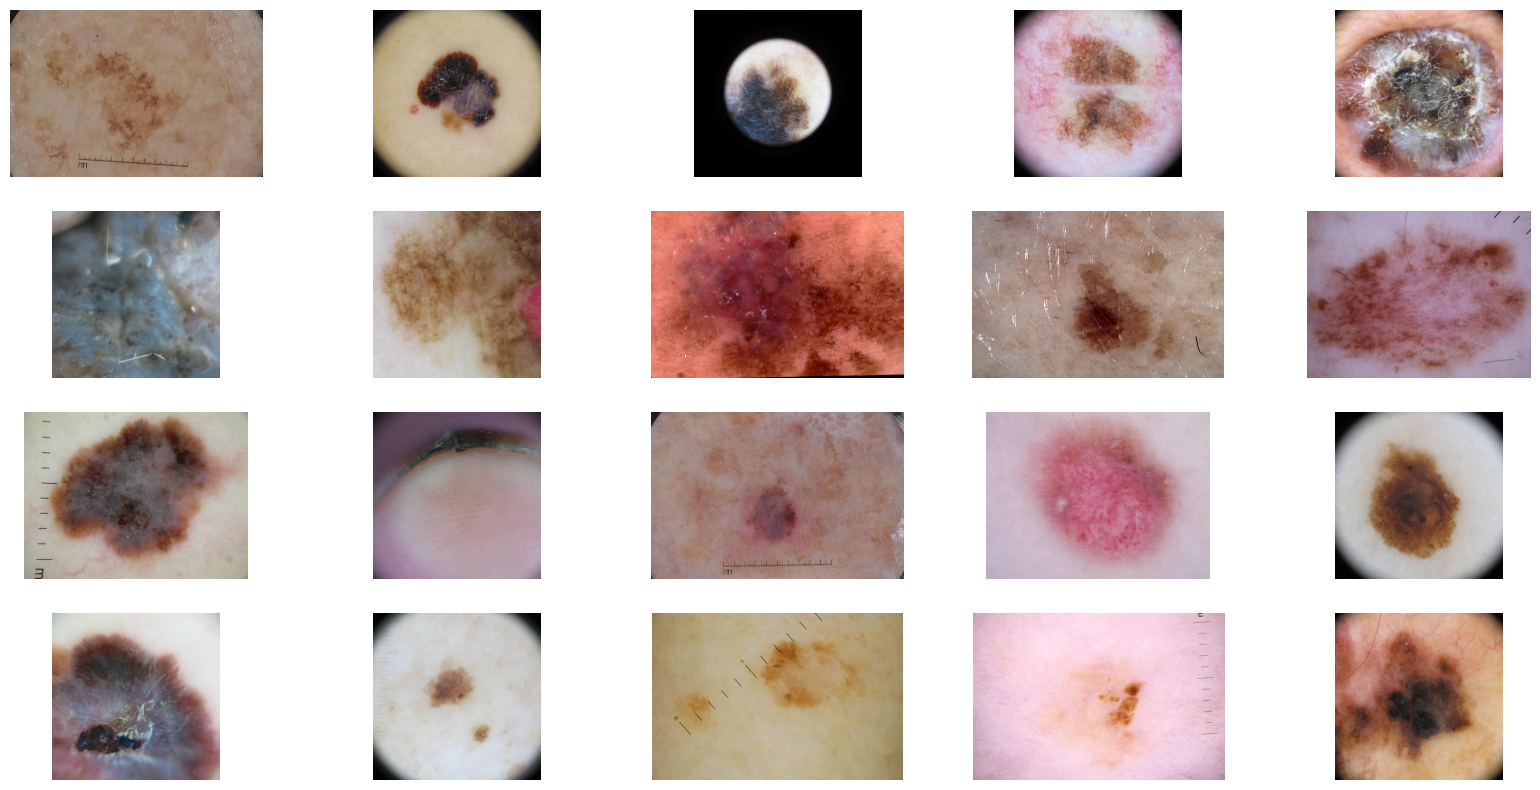

In [6]:
random_viz_cropped(archive_save_path)